# Demo Notebook to train, save, and load a model, which will be used on the Flask Webapp

## Imports

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Data Processing

In [2]:
dataset = pd.read_csv('playground/data/mobile-price-classification/train.csv')

#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

C:\Users\Anonym\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


## Model Construction

In [3]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training

In [4]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





1800/1800 [==============================] - 2s 989us/step - loss: 1.5038 - acc: 0.2706
Epoch 2/100
1800/1800 [==============================] - 0s 80us/step - loss: 1.4033 - acc: 0.2900
Epoch 3/100
1800/1800 [==============================] - 0s 83us/step - loss: 1.3488 - acc: 0.3278
Epoch 4/100
1800/1800 [==============================] - 0s 77us/step - loss: 1.3028 - acc: 0.3683
Epoch 5/100
1800/1800 [==============================] - 0s 89us/step - loss: 1.2558 - acc: 0.4128
Epoch 6/100
1800/1800 [==============================] - 0s 79us/step - loss: 1.2031 - acc: 0.4533
Epoch 7/100
1800/1800 [==============================] - 0s 86us/step - loss: 1.1452 - acc: 0.4956
Epoch 8/100
1800/1800 [==============================] - 0s 88us/step - loss: 1.0812 - acc: 0.5306
Epoch 9/100
1800/1800 [==============================] - 0s 80us/step - loss: 1.0117 - acc: 0.5778
Epoch 

1800/1800 [==============================] - 0s 93us/step - loss: 0.0850 - acc: 0.9811
Epoch 64/100
1800/1800 [==============================] - 0s 160us/step - loss: 0.0844 - acc: 0.9761
Epoch 65/100
1800/1800 [==============================] - 0s 128us/step - loss: 0.0814 - acc: 0.9822
Epoch 66/100
1800/1800 [==============================] - 0s 70us/step - loss: 0.0797 - acc: 0.9817
Epoch 67/100
1800/1800 [==============================] - 0s 71us/step - loss: 0.0778 - acc: 0.9817
Epoch 68/100
1800/1800 [==============================] - 0s 68us/step - loss: 0.0783 - acc: 0.9794
Epoch 69/100
1800/1800 [==============================] - 0s 68us/step - loss: 0.0755 - acc: 0.9833
Epoch 70/100
1800/1800 [==============================] - 0s 65us/step - loss: 0.0740 - acc: 0.9833
Epoch 71/100
1800/1800 [==============================] - 0s 70us/step - loss: 0.0718 - acc: 0.9839
Epoch 72/100
1800/1800 [==============================] - 0s 73us/step - loss: 0.0697 - acc: 0.9850
Epoch 73/10

## Testing

In [5]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
    
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Accuracy is: 91.0
Train on 1800 samples, validate on 200 samples
Epoch 1/100
1800/1800 [==============================] - 0s 172us/step - loss: 0.0417 - acc: 0.9944 - val_loss: 0.2723 - val_acc: 0.9100
Epoch 2/100
1800/1800 [==============================] - 0s 75us/step - loss: 0.0409 - acc: 0.9944 - val_loss: 0.2775 - val_acc: 0.9100
Epoch 3/100
1800/1800 [==============================] - 0s 79us/step - loss: 0.0403 - acc: 0.9950 - val_loss: 0.2752 - val_acc: 0.9100
Epoch 4/100
1800/1800 [==============================] - 0s 75us/step - loss: 0.0409 - acc: 0.9939 - val_loss: 0.2759 - val_acc: 0.9150
Epoch 5/100
1800/1800 [==============================] - 0s 80us/step - loss: 0.0389 - acc: 0.9967 - val_loss: 0.2819 - val_acc: 0.9250
Epoch 6/100
1800/1800 [==============================] - 0s 83us/step - loss: 0.0393 - acc: 0.9950 - val_loss: 0.2801 - val_acc: 0.9100
Epoch 7/100
1800/1800 [==============================] - 0s 86us/step - loss: 0.0376 - acc: 0.9950 - val_loss: 0.2860 

1800/1800 [==============================] - 0s 86us/step - loss: 0.0162 - acc: 0.9994 - val_loss: 0.3678 - val_acc: 0.9200
Epoch 61/100
1800/1800 [==============================] - ETA: 0s - loss: 0.0158 - acc: 0.998 - 0s 76us/step - loss: 0.0167 - acc: 0.9989 - val_loss: 0.3684 - val_acc: 0.9200
Epoch 62/100
1800/1800 [==============================] - 0s 75us/step - loss: 0.0161 - acc: 1.0000 - val_loss: 0.3712 - val_acc: 0.9200
Epoch 63/100
1800/1800 [==============================] - 0s 76us/step - loss: 0.0153 - acc: 1.0000 - val_loss: 0.3714 - val_acc: 0.9200
Epoch 64/100
1800/1800 [==============================] - 0s 73us/step - loss: 0.0152 - acc: 1.0000 - val_loss: 0.3728 - val_acc: 0.9200
Epoch 65/100
1800/1800 [==============================] - 0s 71us/step - loss: 0.0152 - acc: 0.9994 - val_loss: 0.3714 - val_acc: 0.9200
Epoch 66/100
1800/1800 [==============================] - 0s 71us/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3731 - val_acc: 0.9200
Epoch 67/100
180

## Visualisation

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: 'accuracy'

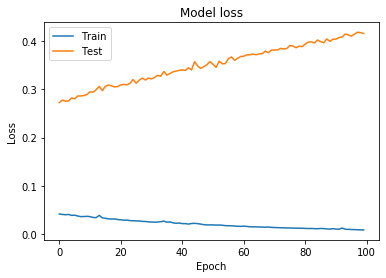

In [7]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

## Save Model

In [8]:
model.save('./playground/demo_model.h5')

## Load Model

Imports and Data Preprocessing have to be executed, then the loaded model can be used for the Testing and Visualisation steps

In [9]:
model = keras.models.load_model('./playground/demo_model.h5')